<a href="https://colab.research.google.com/github/AnshitGuleria/Used-Car-Price-Prediction/blob/main/car_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Import dependencies/libraries***

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

***Data collection and processing***

In [2]:
car_dataset=pd.read_csv('/content/drive/MyDrive/data sets/car_details/car data.csv')

In [3]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
car_dataset.shape

(301, 9)

In [5]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [6]:
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [7]:
#checking the distribution of the categorical data
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data


In [8]:
car_dataset.replace({'Fuel_Type':{'Petrol':0 , 'Diesel':1 , 'CNG':2}},inplace=True)
car_dataset.replace({'Seller_Type':{'Dealer':0 , 'Individual':1 }},inplace=True)
car_dataset.replace({'Transmission':{'Manual':0 , 'Automatic':1 }},inplace=True)

In [9]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [10]:
x=car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
y=car_dataset['Selling_Price']

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

model training

linear regression first

In [12]:
lr=LinearRegression()

In [13]:
lr.fit(x_train,y_train)

LinearRegression()

In [14]:
#prediction on training data
lr_pred_train=lr.predict(x_train)

In [15]:
#r_squared error
error_score=metrics.r2_score(y_train,lr_pred_train)
print("R SQUARED ERROR ",error_score)

R SQUARED ERROR  0.8799451660493711


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

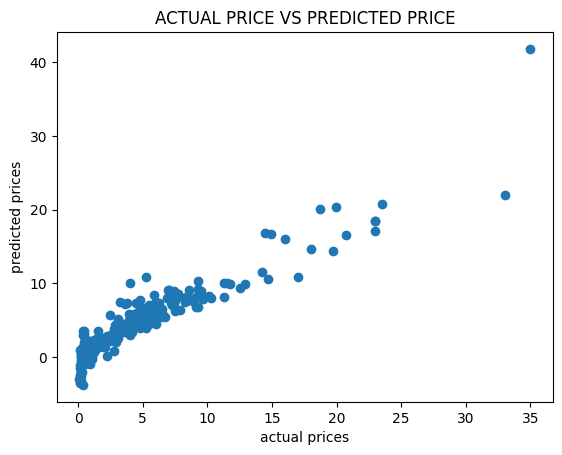

In [16]:
plt.scatter(y_train,lr_pred_train)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

In [17]:
#prediction on test data
lr_pred_test=lr.predict(x_test)

In [18]:
#r_squared error
error_score=metrics.r2_score(y_test,lr_pred_test)
print("R SQUARED ERROR ",error_score)

R SQUARED ERROR  0.8365766715027051


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

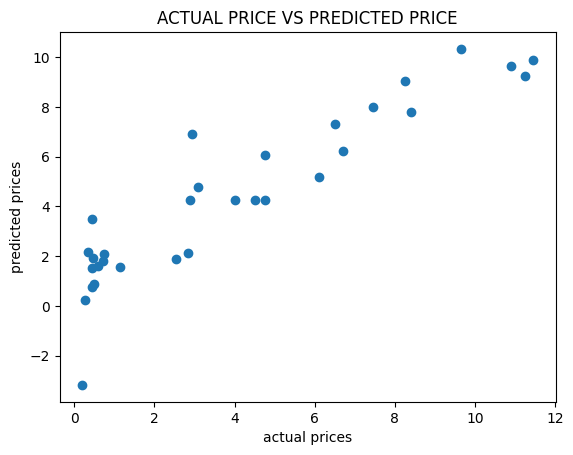

In [19]:
plt.scatter(y_test,lr_pred_test)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

lasso regression

In [20]:
ls=Lasso()

In [21]:
ls.fit(x_train,y_train)

Lasso()

In [22]:
#prediction on train data
ls_pred_train=ls.predict(x_train)

In [23]:
#r square calculation
error_score2=metrics.r2_score(y_train,ls_pred_train)
print("ERROR SCORE ",error_score2)

ERROR SCORE  0.8427856123435794


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

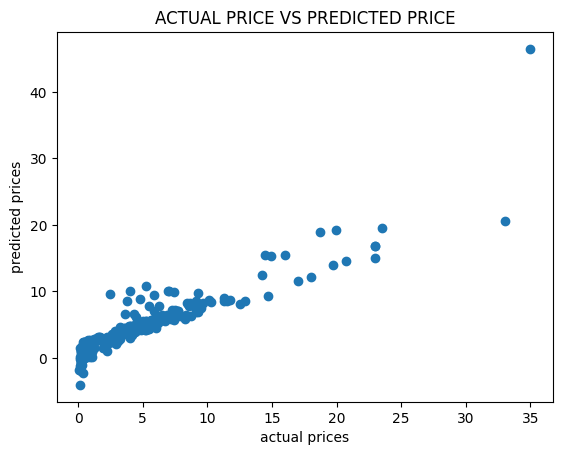

In [24]:
plt.scatter(y_train,ls_pred_train)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")

In [25]:
#prediction on test data
ls_pred_test=ls.predict(x_test)

In [26]:
#r square calculation
error_score2=metrics.r2_score(y_test,ls_pred_test)
print("ERROR SCORE ",error_score2)

ERROR SCORE  0.8709167941173195


Text(0.5, 1.0, 'ACTUAL PRICE VS PREDICTED PRICE')

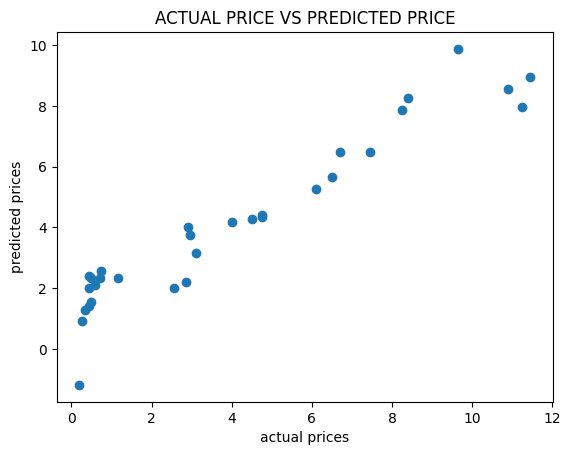

In [27]:
plt.scatter(y_test,ls_pred_test)
plt.xlabel('actual prices')
plt.ylabel('predicted prices')
plt.title("ACTUAL PRICE VS PREDICTED PRICE")